# Hands On 2 - Image Processing
---
## Personal Identity
| Subject         | Results            |
|-----------------|--------------------|
| Nama Mahasiswa  | Kevin Simorangkir  |
| Kelas           | R                  |
| NIM             | 121140150          |

## Questions Instructions
1. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini. Editlah sebuah foto yang terdapat
   wajah anda, namun kali ini tidak dengan photoshop, melainkan dengan python. Lakukan penyesuaian berikut ini.
   - Lakukan resize untuk foto anda menjadi 1080 pada dimension terpanjangnya. Gunakan cv2.resize untuk melakukan resize.
   - Buatlah frame berwarna kuning (RGB value: 255, 255, 0) sebesar 25 pixel + dua digit terakhir NIM anda pada setiap sisi foto anda. Frame tersebut akan mengelilingi foto setebal 25 pixel + dua digit terakhir NIM anda.
   - Aturlah intensitas warna pada channel merah di bagian tengah (50 - 150), dan naikkan sebesar 20 poin
   - Turunkanlah intensitas warna pada channel biru di atas (200- 250), dan turunkan sebesar 20 poin
   - Tampilkanlah histogram dari foto tersebut
   - Jelaskan hasil eksperimen anda

2. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini
   - Convert image dari RGB menjadi Grayscale
   - Tampilkan histogram dari foto tersebut
   - Lakukanlah normalisasi level intensitas warna pada foto tersebut. Aturlah agar intensitas warna terendah menjadi 0, dan intensitas warna tertinggi menjadi 255
   - Tampilkan histogram dari hasil normalisasi
   - Buatlah pixel-art dari foto tersebut. Caranya adalah dengan mengubah intensitas warna menjadi 0 atau 255. Jika intensitas warna < 128, maka ubah menjadi 0, dan jika intensitas warna >= 128, maka ubah menjadi 255. Tunjukkan hasilnya

3. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini
   - Naikkan kecerahan (brightnes) pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menaikkan kecerahan. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut
   - Turunkan saturasi warna pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menurunkan saturasi warna. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut
   - Turunkan kontras pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menurunkan kontras. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut

---

### Question - 01
1. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini. Editlah sebuah foto yang terdapat
   wajah anda, namun kali ini tidak dengan photoshop, melainkan dengan python. Lakukan penyesuaian berikut ini.
   - Lakukan resize untuk foto anda menjadi 1080 pada dimension terpanjangnya. Gunakan cv2.resize untuk melakukan resize.
   - Buatlah frame berwarna kuning (RGB value: 255, 255, 0) sebesar 25 pixel + dua digit terakhir NIM anda pada setiap sisi foto anda. Frame tersebut akan mengelilingi foto setebal 25 pixel + dua digit terakhir NIM anda.
   - Aturlah intensitas warna pada channel merah di bagian tengah (50 - 150), dan naikkan sebesar 20 poin
   - Turunkanlah intensitas warna pada channel biru di atas (200- 250), dan turunkan sebesar 20 poin
   - Tampilkanlah histogram dari foto tersebut
   - Jelaskan hasil eksperimen anda

### Answer - 01

1. Langkah pertama adalah menyiapkan pustaka yang akan digunakan. Dalam hal ini menggunakan 3 (tiga) pustaka yaitu `numpy` , `matplotlib.pyplot` , `cv2` .

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

2. Memanggil gambar yang akan dieksekusi dalam kasus ini.

In [49]:
gambar = cv2.imread('Image/KEVINS.jpg')

3. Melakukan _resize_ dengan memanggil beberapa fungsi dengan definisi dari `tinggi` dan `lebar` .

In [50]:
tinggi, lebar = gambar.shape[:2]
if tinggi > lebar:
    tinggi_baru = 1080
    lebar_baru = int(tinggi_baru / tinggi * lebar)
else:
    lebar_baru = 1080
    tinggi_baru = int(lebar_baru / lebar * tinggi)

4. Melakukan definisi dari gambar_baru yang terdiri dari lebar_baru dan tinggi_baru.

In [51]:
gambar_baru = cv2.resize(gambar, (lebar_baru, tinggi_baru))

5. Membuat sebuah `variable` baru untuk penjelasan sebuah bingkai berwarna kuning yang dijelaskan dalam `variable` bingkai_kuning.

In [52]:
bingkai_tipis = 75 #25 + 50 = 75
bingkai_kuning = cv2.copyMakeBorder(gambar_baru, bingkai_tipis, bingkai_tipis, bingkai_tipis, bingkai_tipis, cv2.BORDER_CONSTANT, value=[0, 255, 255])  # Kuning

6. Membuat sebuah `variable` baru dengan kaitan channel merah yang akan berkorelasi dengan bingkai kuning.

In [53]:
channel_merah = bingkai_kuning[:, :, 2]
mask_merah = (channel_merah >= 50) & (channel_merah <= 150)
bingkai_kuning[:, :, 2][mask_merah] = np.clip(bingkai_kuning[:, :, 2][mask_merah] + 20, 0, 255)

7. Membuat sebuah `variable` baru dengan kaitan channel_biru yang akan berkorelasi dengan bingkai kuning serta mask_biru.

In [54]:
channel_biru = bingkai_kuning[:, :, 0]
mask_biru = (channel_biru >= 200) & (channel_biru <= 250)
bingkai_kuning[:, :, 0][mask_biru] = np.clip(bingkai_kuning[:, :, 0][mask_biru] + 20, 0, 255)

8. Menampilkan hasil gambar yang telah dimodifikasi melalui beberapa kodingan sebelumnya dan akan menampilkan dengan file **KEVINS_MODIFIKASI.JPG** yang ada di folder _Image_.

In [55]:
cv2.imshow('Gambar Modifikasi', bingkai_kuning)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('Image/KEVINS_MODIFIKASI.JPG', bingkai_kuning)

True

9. Melakukan pemanggilan dalam pustaka `plt` untuk membuat sebuah histogram yang diminta serta mendefinisikan histogram tersebut.

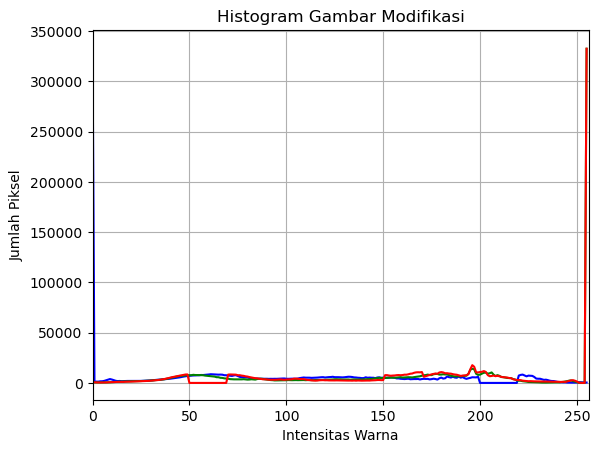

In [56]:
warna = ('b', 'g', 'r')
for i, col in enumerate(warna):
    histogram = cv2.calcHist([bingkai_kuning], [i], None, [256], [0, 256])
    plt.title('Histogram Gambar Modifikasi')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Piksel')
    plt.grid()
    plt.plot(histogram, color=col)
    plt.xlim([0, 256])
plt.show()

10. Mari Kita Analisis (MaKiAn)
    - Gambar diubah ukurannya menjadi sisi terpanjangnnya menjadi 1080 px dan aspek rasio tetap dipertahankan.
    - Gambar KEVINS.JPG dikelilingi oleh frame / bingkai berwarna kuning dengan ukuran tebal 75 px ( 25 + 50 (2 Digit NIM Terakhir)).
    - Intensitas warna merah di bagian tengah gambar yang berada dalam rentang 50-150 telah ditingkatkan sebesar 20 poin.
    - Histogram menunjukkan distribusi warna gambar setelah modifikasi, memperlihatkan bagaimana nilai intensitas untuk setiap channel (merah, hijau, biru) telah berubah.

---

### Question - 02
2. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini
   - Convert image dari RGB menjadi Grayscale
   - Tampilkan histogram dari foto tersebut
   - Lakukanlah normalisasi level intensitas warna pada foto tersebut. Aturlah agar intensitas warna terendah menjadi 0, dan intensitas warna tertinggi menjadi 255
   - Tampilkan histogram dari hasil normalisasi
   - Buatlah pixel-art dari foto tersebut. Caranya adalah dengan mengubah intensitas warna menjadi 0 atau 255. Jika intensitas warna < 128, maka ubah menjadi 0, dan jika intensitas warna >= 128, maka ubah menjadi 255. Tunjukkan hasilnya

### Answer - 02

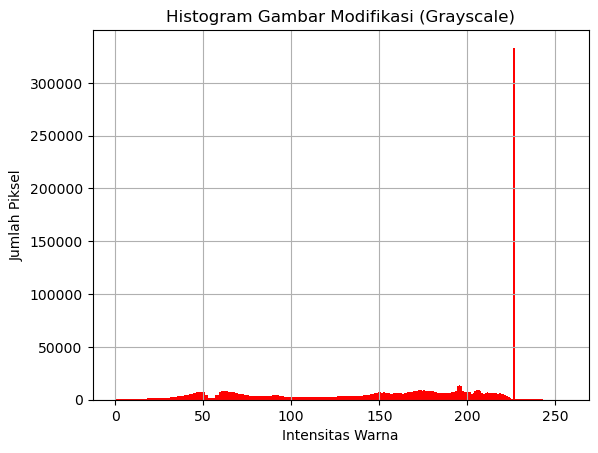

In [57]:
gambar_gray = cv2.cvtColor(bingkai_kuning, cv2.COLOR_BGR2GRAY)
plt.hist(gambar_gray.ravel(), bins=256, range=[0, 256], color='red')
plt.title('Histogram Gambar Modifikasi (Grayscale)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Piksel')
plt.grid()
plt.show()

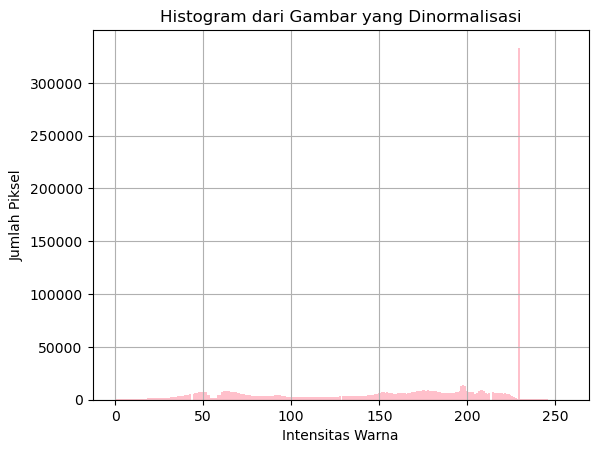

In [58]:
gambar_normalized = cv2.normalize(gambar_gray, None, 0, 255, cv2.NORM_MINMAX)
plt.hist(gambar_normalized.ravel(), bins=256, range=[0, 256], color='pink')
plt.title('Histogram dari Gambar yang Dinormalisasi')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Piksel')
plt.grid()
plt.show()

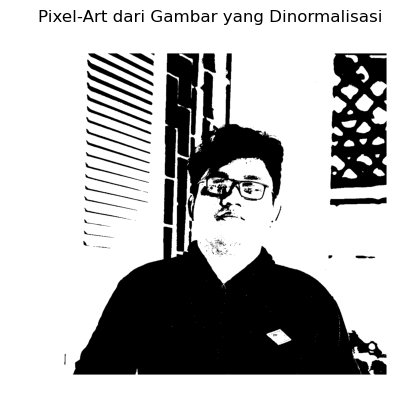

In [59]:
gambar_pixel_art = np.where(gambar_normalized < 128, 0, 255).astype(np.uint8)
plt.imshow(gambar_pixel_art, cmap='gray')
plt.title('Pixel-Art dari Gambar yang Dinormalisasi')
plt.xlabel('Lebar')
plt.ylabel('Tinggi')
plt.grid(False)
plt.axis('off')
plt.show()

---

### Question - 03
3. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini
   - Naikkan kecerahan (brightnes) pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menaikkan kecerahan. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut
   - Turunkan saturasi warna pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menurunkan saturasi warna. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut
   - Turunkan kontras pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menurunkan kontras. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut

### Answer - 03

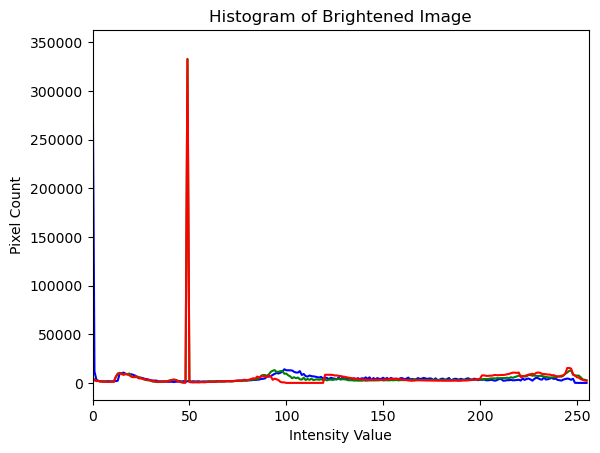

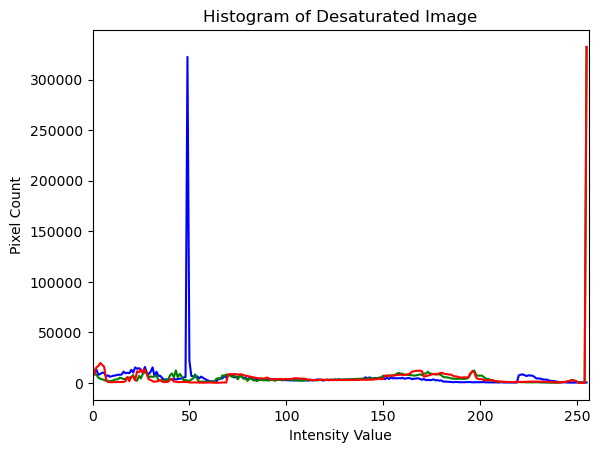

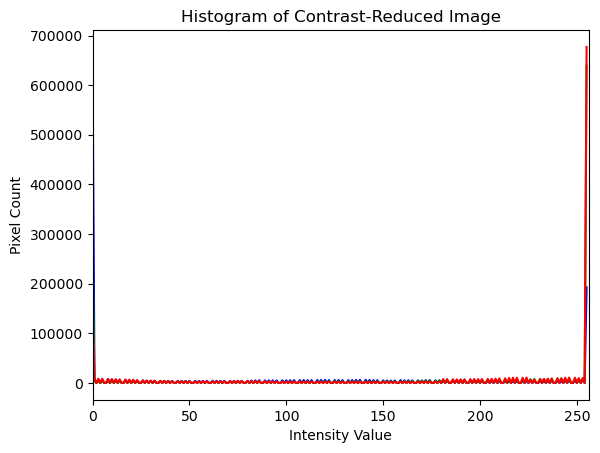

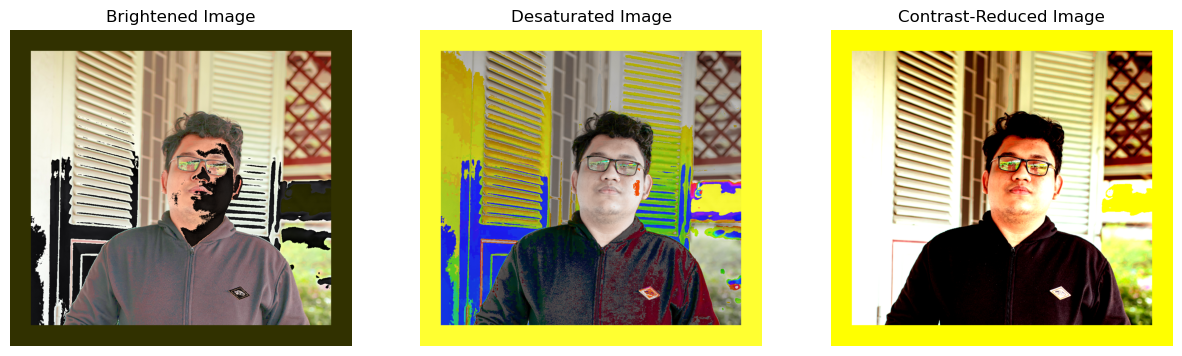

In [60]:
# Increase brightness
def increase_brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = np.clip(v + value, 0, 255)
    final_hsv = cv2.merge((h, s, v))
    bright_image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return bright_image

# Decrease saturation
def decrease_saturation(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    s = np.clip(s - value, 0, 255)
    final_hsv = cv2.merge((h, s, v))
    desaturated_image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return desaturated_image

# Decrease contrast
def decrease_contrast(image, factor):
    f = 131 * (factor + 127) / (127 * (131 - factor))
    alpha_c = f
    gamma_c = 127 * (1 - f)
    contrast_image = cv2.addWeighted(image, alpha_c, image, 0, gamma_c)
    return contrast_image

# Apply the transformations
brightness_value = 50  # Increase brightness by 50
saturation_value = 50  # Decrease saturation by 50
contrast_factor = 50   # Decrease contrast by 50

bright_image = increase_brightness(bingkai_kuning, brightness_value)
desaturated_image = decrease_saturation(bingkai_kuning, saturation_value)
contrast_image = decrease_contrast(bingkai_kuning, contrast_factor)

# Display histograms
def display_histogram(image, title):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=col)
        plt.xlim([0, 256])
    plt.title(title)
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    plt.show()

# Display histograms for each transformation
display_histogram(bright_image, 'Histogram of Brightened Image')
display_histogram(desaturated_image, 'Histogram of Desaturated Image')
display_histogram(contrast_image, 'Histogram of Contrast-Reduced Image')

# Show the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(bright_image, cv2.COLOR_BGR2RGB))
plt.title('Brightened Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(desaturated_image, cv2.COLOR_BGR2RGB))
plt.title('Desaturated Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(contrast_image, cv2.COLOR_BGR2RGB))
plt.title('Contrast-Reduced Image')
plt.axis('off')

plt.show()